# Transforma de Netcdf para TIF e depois plota com Leafmap - `ARQUIVOS GOES-16`

Conhecendo os dados

In [2]:
# importa biblioteca
import leafmap
import rasterio
import rioxarray
import xarray as xr

# leitura do dado
temp_ir = rioxarray.open_rasterio('input/S10635346_202405020300.nc')
temp_ir = xr.open_dataset('input/S10635346_202405020300.nc')

# transforma de Kelvin para Celsius
temp_ir['Band1'] = (temp_ir['Band1']/100.0)-273.15

In [3]:
# mostra o dataset
temp_ir

<xarray.Dataset> Size: 78MB
Dimensions:  (lat: 3131, lon: 3131)
Coordinates:
  * lat      (lat) float64 25kB -55.99 -55.96 -55.93 -55.9 ... 34.93 34.96 34.99
  * lon      (lon) float64 25kB -116.0 -116.0 -115.9 ... -25.07 -25.04 -25.01
Data variables:
    Band1    (lat, lon) float64 78MB -11.28 -11.28 -11.34 ... 1.13 1.13 7.83
    crs      |S1 1B ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Thu May 02 03:16:30 2024: GDAL Create( /dados/output/goes16...

In [3]:
# valor mínimo e máximo de temperatura
print( float(temp_ir['Band1'].min()), float(temp_ir['Band1'].max()) )

-89.38999999999999 28.660000000000025


In [4]:
# importa biblioteca
import leafmap
import rasterio
import rioxarray
import xarray as xr

# transforma de netcdf para tif
filename = 'S10635346_202405020300.nc'
tif = "temp_ir_ABI_GOES16.tif"
leafmap.netcdf_to_tif(f'input/{filename}', f'input/{tif}', variables=["Band1"], shift_lon=False)

# plota mapa
Map = leafmap.Map(layers_control=True)

Map.add_raster(f'input/{tif}', indexes=[1], palette="coolwarm", layer_name="Band1")

shp_estados_brasil = 'https://github.com/codeforgermany/click_that_hood/blob/main/public/data/brazil-states.geojson'
Map.add_geojson(shp_estados_brasil, layer_name="Estados do Brasil")

Map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Plota direto o Netcdf com Leafmap - `ARQUIVOS GOES-16`

In [5]:
# importa biblioteca
import leafmap
import rasterio
import rioxarray
import xarray as xr

# nome do arquivo netcdf
filename = 'S10635346_202405020300.nc'

# plota mapa
Map = leafmap.Map()

Map.add_netcdf(f'input/{filename}',
               variables=["Band1"],
               palette="coolwarm",
               shift_lon=True,
               layer_name="Band1",
               indexes=[1])

shp_estados_brasil = 'https://github.com/codeforgermany/click_that_hood/blob/main/public/data/brazil-states.geojson'
Map.add_geojson(shp_estados_brasil, layer_name="Estados do Brasil")

Map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Plota direto o Netcdf com Leafmap - `ARQUIVOS RADAR`

Conhecendo os dados


In [1]:
import xarray as xr
radar = xr.open_dataset('input/chuva_natal_201406.nc')
radar

<xarray.Dataset> Size: 8MB
Dimensions:       (lat: 1000, lon: 1000)
Coordinates:
  * lat           (lat) float64 8kB -8.126 -8.122 -8.117 ... -3.649 -3.644 -3.64
  * lon           (lon) float64 8kB -37.51 -37.51 -37.5 ... -32.99 -32.99 -32.98
Data variables:
    precipitacao  (lat, lon) float64 8MB ...
Attributes:
    creation_data:  2021-11-18 19:19:10.430665
    author:         Enrique V. Mattos
    email:          enrique.vmattos@gmail.com

In [9]:
print(float(radar['precipitacao'].min()), float(radar['precipitacao'].max()))

0.0 436.299647673266


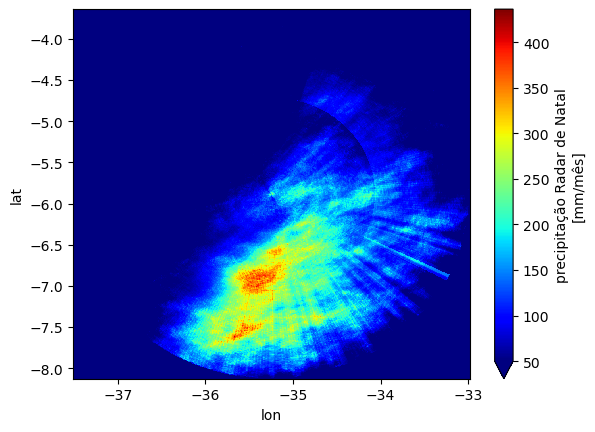

In [2]:
radar['precipitacao'].plot(cmap='jet', vmin=50)

In [1]:
# importa biblioteca
import leafmap
import rasterio
import rioxarray
import xarray as xr

# nome do arquivo netcdf
filename = 'chuva_natal_201406.nc'

# plota mapa
Map = leafmap.Map(layers_control=True)

Map.add_netcdf(f'input/{filename}',
               variables=["precipitacao"],
               palette="jet",
               shift_lon=False,
               layer_name="precipitacao",
               indexes=[1],
               vmin=50, vmax=400,
               nodata=0.0)

shp_estados_brasil = 'https://github.com/codeforgermany/click_that_hood/blob/main/public/data/brazil-states.geojson'
Map.add_geojson(shp_estados_brasil, layer_name="Estados do Brasil")

Map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…